In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 10)

# import some common detetron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

--2020-01-12 02:52:53--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.106.11
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.106.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K  --.-KB/s    in 0.008s  

2020-01-12 02:52:53 (26.4 MB/s) - ‘input.jpg’ saved [209222/209222]



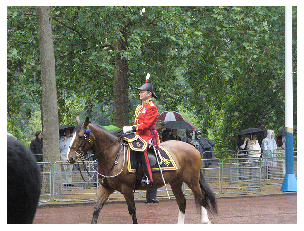

In [3]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")
plt.axis('off'); plt.imshow(im[:,:,::-1])

In [7]:
cfg = get_cfg()
# cfg.merge_from_file("../configs/GENOME-Detection/faster_rcnn_attr_R_101_FPN_3x.yaml")
cfg.merge_from_file("../configs/GENOME-Detection/faster_rcnn_softmax_attr_R_101_C4_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.15  # set threshold for this model
cfg.TEST.ENFORCE_TOPK_DETECTIONS = False
# cfg.MODEL.WEIGHTS = "../output/genome_faster_rcnn_softmax0.5_expminus_attr_R_101_FPN_3x/model_final.pth"
cfg.MODEL.WEIGHTS = "../output/genome_faster_rcnn_softmax0.5_expminus_attr_R_101_C4_3x/model_final.pth"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

WARNING [01/12 06:11:29 d2.config.compat]: Config '../configs/GENOME-Detection/faster_rcnn_softmax_attr_R_101_C4_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


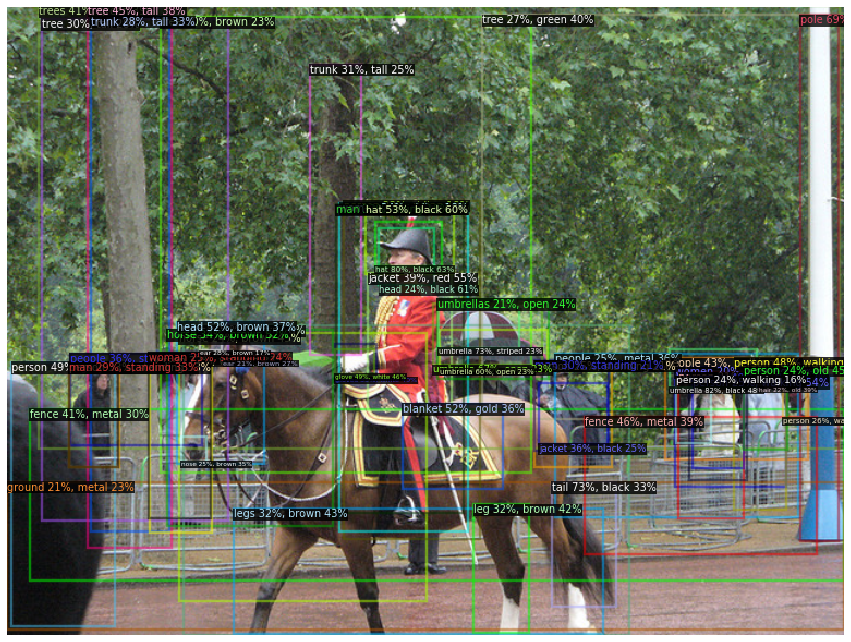

In [6]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.rcParams['figure.figsize'] = (15, 20)
plt.axis('off'); plt.imshow(v.get_image())

In [19]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
# outputs["instances"].pred_classes
# outputs["instances"].pred_boxes
# outputs["instances"].pred_attr_probs